In [1]:
from PIL import Image
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

load images

In [2]:
tree = Image.open('/Users/danieljdenman/Desktop/tree_100.tiff')
buffalo = Image.open('/Users/danieljdenman/Desktop/Buffalo_100.tiff')

In [3]:
print(np.shape(tree))
print(np.shape(buffalo))

(1024, 1536)
(1024, 1534)


generate mask

In [4]:
mask = ndimage.gaussian_filter(np.random.rand(np.shape(buffalo)[0],np.shape(buffalo)[1])\
                                   ,(200,200))
mask -= np.min(mask)
mask/=np.max(mask)
mask*=255


composite the two images together with the mask

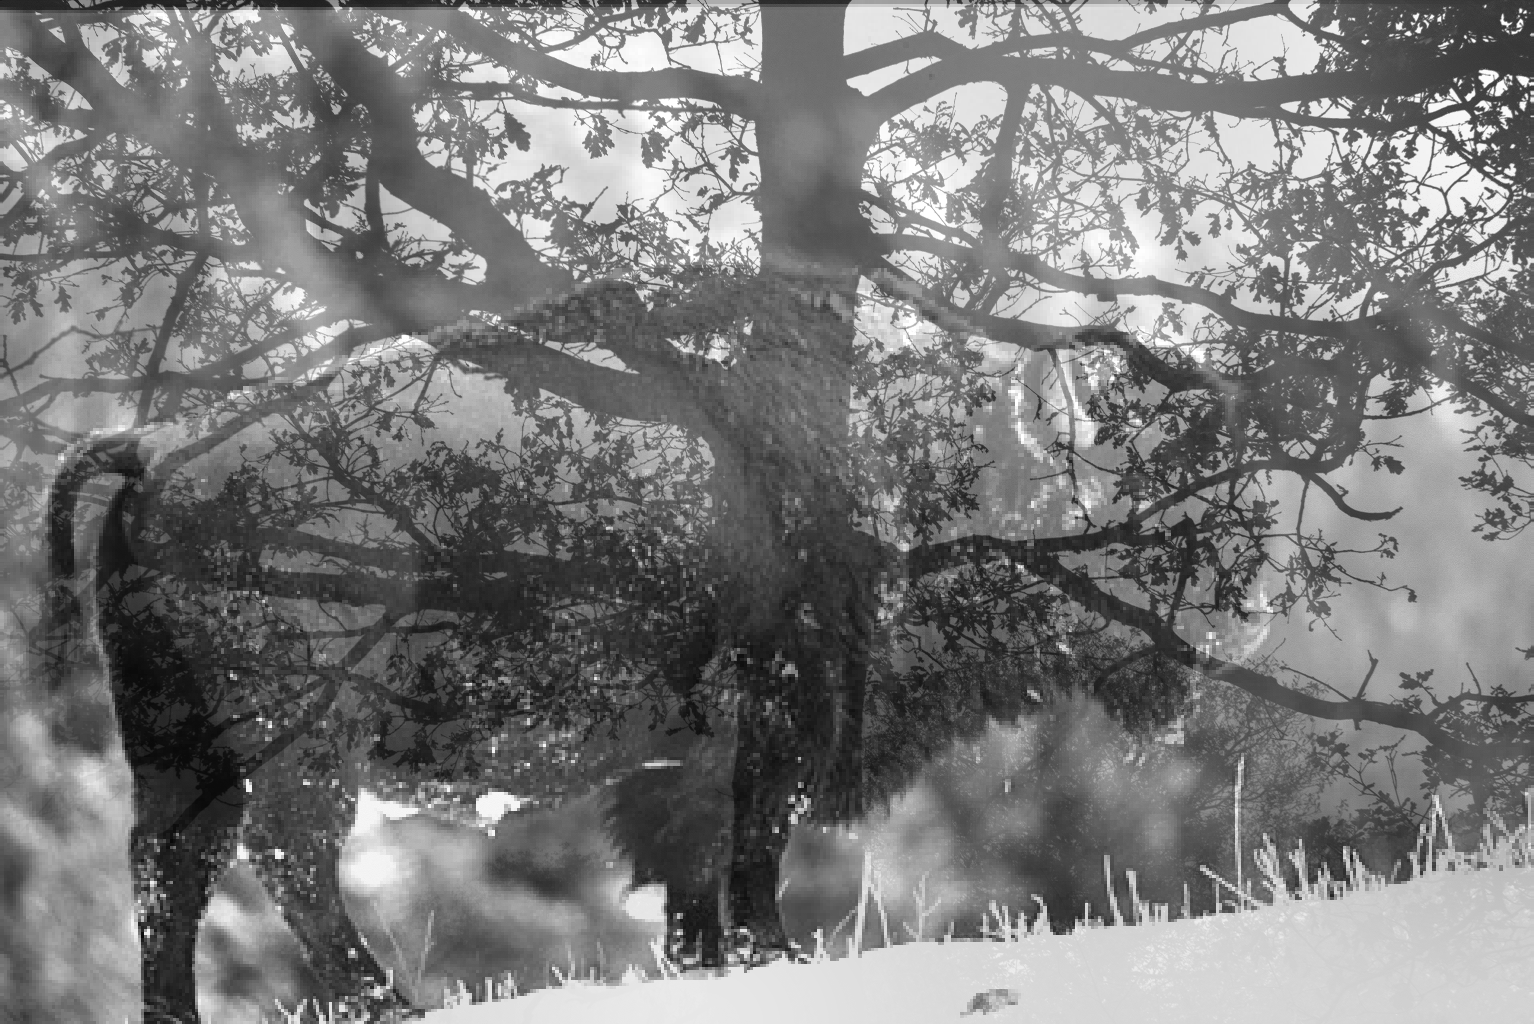

In [161]:
Image.composite(tree.resize(buffalo.size), buffalo, Image.fromarray(np.uint8(mask)))

In [108]:
ratio = 0.8
rr = np.random.uniform(size=(np.shape(buffalo)[0],np.shape(buffalo)[1])).flatten()
# rr = np.random.wald(0.5,1,size=(np.shape(buffalo)[0],np.shape(buffalo)[1]))
# args = np.argsort(rr)
# rr[args[:int(len(rr)/2)]] *= ratio
# rr[args[int(len(rr)/2)]:] /= ratio
rr_ = rr.reshape(np.shape(buffalo)[0],np.shape(buffalo)[1])
# rr_=rr
mask =  ndimage.gaussian_filter(rr_,(200,200))
mask -= np.min(mask)
mask/=np.max(mask)
mask*=255
mask[mask<127]*=ratio
mask[mask>127]/=ratio

In [159]:
rr = np.random.wald(0.5,1,size=(np.shape(buffalo)[0],np.shape(buffalo)[1]))
rr_=rr
mask =  ndimage.gaussian_filter(rr_,(200,200))
mask -= np.min(mask)
mask/=np.max(mask)
mask*=255
# mask[mask<127]=0
# mask[mask>127]=255

ratio: 39.65092028601695% tree


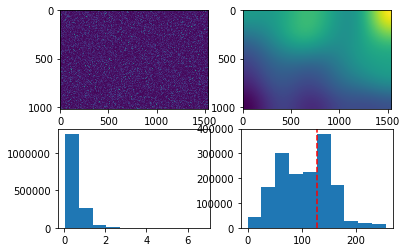

In [160]:
f,ax=plt.subplots(2,2)
ax[0][0].imshow(rr_)
ax[0][1].imshow(mask)
ax[1][0].hist(rr_.flatten())
ax[1][1].hist(mask.flatten())
ax[1][1].axvline(127,color='r',ls='--')
print('ratio: '+str(np.argwhere(mask>127).shape[0] / (np.shape(mask)[0]*np.shape(mask)[1])*100)+'% tree')

In [163]:
for i in range (1000):
    rr = np.random.wald(0.5,1,size=(np.shape(buffalo)[0],np.shape(buffalo)[1]))
    rr_=rr
    mask =  ndimage.gaussian_filter(rr_,(200,200))
    mask -= np.min(mask)
    mask/=np.max(mask)
    mask*=255
    # mask[mask<127]=0
    # mask[mask>127]=255
    np.save(open('/Users/danieljdenman/Desktop/masks/mask_'+str(int(np.round(np.argwhere(mask>127).shape[0] / (np.shape(mask)[0]*np.shape(mask)[1])*100)))+'.npy','wb'),mask)

KeyboardInterrupt: 

In [165]:
import glob

In [179]:
f.split('_')[1].strip('npy')

'39.'

In [182]:
percs = []
for f in glob.glob('/Users/danieljdenman/Desktop/masks/mask_*'):
    perc = f.split('_')[1].strip('.npy')
    percs.extend([int(perc)])

(array([ 2.,  6.,  9.,  8.,  9., 10.,  8.,  9.,  7.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

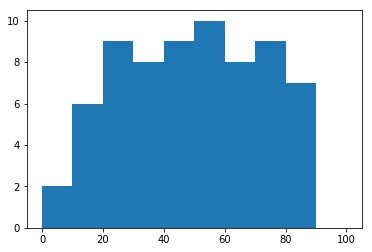

In [183]:
plt.hist(percs,range=(0,100),bins=10)

In [175]:
percs

['3',
 '4',
 '.',
 '2',
 '1',
 '.',
 '3',
 '5',
 '.',
 '2',
 '3',
 '.',
 '3',
 '7',
 '.',
 '3',
 '6',
 '.',
 '2',
 '2',
 '.',
 '2',
 '6',
 '.',
 '3',
 '2',
 '.',
 '2',
 '7',
 '.',
 '1',
 '9',
 '.',
 '2',
 '5',
 '.',
 '9',
 '.',
 '8',
 '.',
 '2',
 '4',
 '.',
 '3',
 '0',
 '.',
 '1',
 '8',
 '.',
 '5',
 '7',
 '.',
 '4',
 '3',
 '.',
 '8',
 '0',
 '.',
 '4',
 '2',
 '.',
 '5',
 '6',
 '.',
 '4',
 '0',
 '.',
 '5',
 '4',
 '.',
 '6',
 '8',
 '.',
 '8',
 '2',
 '.',
 '6',
 '9',
 '.',
 '5',
 '5',
 '.',
 '7',
 '9',
 '.',
 '4',
 '5',
 '.',
 '5',
 '1',
 '.',
 '8',
 '7',
 '.',
 '5',
 '0',
 '.',
 '4',
 '4',
 '.',
 '7',
 '8',
 '.',
 '5',
 '2',
 '.',
 '4',
 '6',
 '.',
 '8',
 '5',
 '.',
 '8',
 '4',
 '.',
 '4',
 '7',
 '.',
 '5',
 '3',
 '.',
 '7',
 '6',
 '.',
 '8',
 '9',
 '.',
 '8',
 '8',
 '.',
 '6',
 '3',
 '.',
 '7',
 '7',
 '.',
 '6',
 '1',
 '.',
 '7',
 '5',
 '.',
 '4',
 '9',
 '.',
 '4',
 '8',
 '.',
 '7',
 '4',
 '.',
 '6',
 '0',
 '.',
 '5',
 '8',
 '.',
 '7',
 '1',
 '.',
 '6',
 '5',
 '.',
 '5',
 '9',
 '.',
 '7'

In [6]:
from numpy.fft import fft2, fft

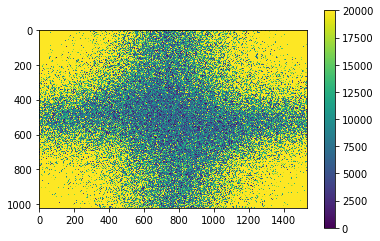

In [72]:
plt.imshow(abs(fft2(tree)),clim=(0,20000))
plt.colorbar()

Text(0.5, 1.0, 'tree 2D FFT')

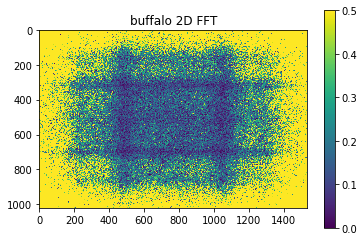

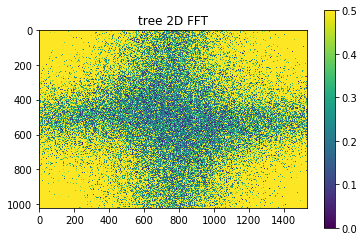

In [28]:
twodfft = abs(fft2(buffalo))
plt.imshow(twodfft/np.mean(twodfft),clim=(0,.5))
plt.colorbar()
plt.title('buffalo 2D FFT')

plt.figure()
twodfft_ = abs(fft2((tree.resize(buffalo.size))))
plt.imshow(twodfft_/np.mean(twodfft_),clim=(0,.5))
plt.colorbar()
plt.title('tree 2D FFT')

In [27]:
np.corrcoef(twodfft.flatten(),twodfft_.flatten())

array([[1.        , 0.89813639],
       [0.89813639, 1.        ]])

In [29]:
np.linalg.norm(twodfft-twodfft_)

103890179.50926162

## cluster the 2D FFT distance matrix, to see if there are groups of simlar images we can choose from

from michael on slack:

In [36]:
distance_matrix = np.array([[       0, 61750757, 63996546, 64291017, 78157957, 70372227, 75860546, 77773617,
  82158393, 72100569, 75303949, 87043849, 60482357, 80239229, 84337857, 76813109],
 [61750757,        0, 66634941, 56196990, 63666346, 65591883, 67361703, 68684609,
  70944728, 57956487, 71016919, 85521922, 55350095, 79335306, 70183382, 70189229],
 [63996546, 66634941,        0, 63986354, 77119329, 62836896, 77116860, 70970673,
  86027362, 69793602, 79972640, 89983091, 60017429, 84606105, 72335039, 92531992],
 [64291017, 56196990, 63986354,        0, 63528352, 66360215, 64086471, 71598881,
  73513533, 65369685, 77376929, 88750318, 58622476, 80529295, 74167423, 72181386],
 [78157957, 63666346, 77119329, 63528352,        0, 73133793, 55013391, 79900356,
  60705752, 62013502, 72560554, 88396151, 67275675, 80033832, 66786282, 65110772],
 [70372227, 65591883, 62836896, 66360215, 73133793,        0, 71690890, 68338265,
  72958744, 63805207, 74738259, 84281605, 65319840, 80909243, 74023054, 81264549],
 [75860546, 67361703, 77116860, 64086471, 55013391, 71690890,        0, 73543448,
  65590342, 71749595, 72962840, 79818988, 72169205, 78837336, 74796851, 67303494],
 [77773617, 68684609, 70970673, 71598881, 79900356, 68338265, 73543448,        0,
  80405041, 66222084, 75509252, 91440579, 67926767, 87921729, 68975470, 89654413],
 [82158393, 70944728, 86027362, 73513533, 60705752, 72958744, 65590342, 80405041,
         0, 70218687, 70070434, 87550320, 74971133, 68941668, 78050617, 61820576],
 [72100569, 57956487, 69793602, 65369685, 62013502, 63805207, 71749595, 66222084,
  70218687,        0, 68049069, 85779412, 61144427, 78857962, 62677497, 77620627],
 [75303949, 71016919, 79972640, 77376929, 72560554, 74738259, 72962840, 75509252,
  70070434, 68049069,        0, 87787654, 70806716, 74782403, 76697085, 78412806],
 [87043849, 85521922, 89983091, 88750318, 88396151, 84281605, 79818988, 91440579,
  87550320, 85779412, 87787654,        0, 89463127, 90911201, 93781941, 92071885],
 [60482357, 55350095, 60017429, 58622476, 67275675, 65319840, 72169205, 67926767,
  74971133, 61144427, 70806716, 89463127,        0, 77953948, 68899110, 76904600],
 [80239229, 79335306, 84606105, 80529295, 80033832, 80909243, 78837336, 87921729,
  68941668, 78857962, 74782403, 90911201, 77953948,        0, 86745176, 75785352],
 [84337857, 70183382 ,72335039, 74167423, 66786282, 74023054, 74796851, 68975470,
  78050617, 62677497 ,76697085, 93781941, 68899110, 86745176,        0, 89789009],
 [76813109, 70189229 ,92531992, 72181386, 65110772, 81264549, 67303494, 89654413,
  61820576, 77620627, 78412806, 92071885, 76904600, 75785352, 89789009,        0]])

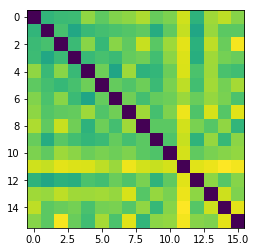

In [38]:
plt.imshow(distance_matrix)

In [39]:
from sklearn.cluster import AgglomerativeClustering

labels: [0 0 0 0 3 0 3 0 3 0 1 2 0 1 0 3]


/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


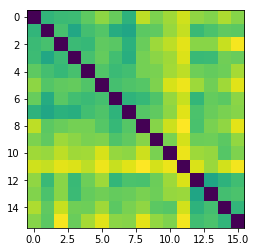

In [67]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(distance_matrix)
print('labels: '+str(clustering.labels_))
sorted_distance = distance_matrix[np.argsort(clustering.labels_),:][:,np.argsort(clustering.labels_)]
plt.imshow(sorted_distance)

the labels are in this array:

In [68]:
print('labels: '+str(clustering.labels_))

labels: [0 0 0 0 3 0 3 0 3 0 1 2 0 1 0 3]


which is in the order of the distance matrix you sent me. so, turtle is clustering.labels_[11], which is why its in a group (label = 2) of its own. the 

# TODO:
- pre-match sf?
- compute SSIM between blended images. 
- generate noise masks

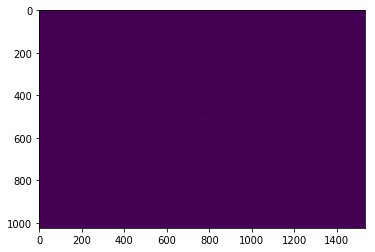

In [13]:
ftimage = np.fft.fft2(buffalo)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage))

In [47]:
fs = 1000 # sample rate 
f = 20 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = np.sin(2*np.pi*f * (x/fs)) 

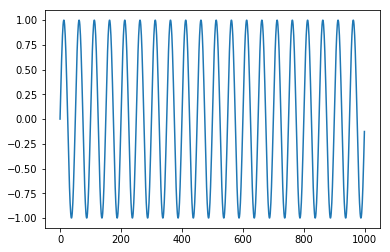

In [48]:
plt.plot(x,y)

In [49]:
y_ = np.tile(y,(1,fs)).reshape(fs,fs)

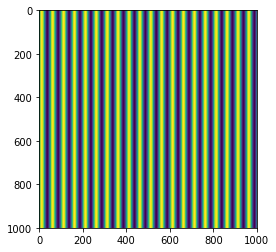

In [50]:
plt.imshow(y_)

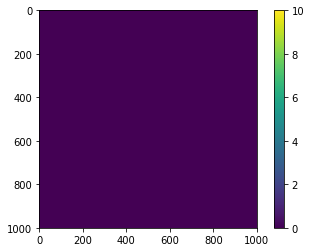

In [51]:
plt.imshow(abs(fft2(y_)),clim=(0,10))
plt.colorbar()

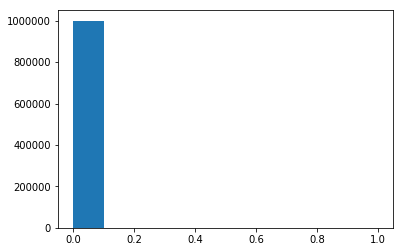

In [61]:
a=plt.hist(abs(fft2(y_)).flatten(),range=(0,1))

In [ ]:
abs(fft2(tree)
abs(fft2(buffalo)

In [73]:
from skimage.feature import match_template

In [77]:
match_template(abs(fft2(tree))abs(fft2(buffalo)))

TypeError: abs() takes exactly one argument (2 given)

In [78]:
from scipy.ndimage.filters import correlate

In [ ]:
correlate(abs(fft2(tree)),
abs(fft2(buffalo)))

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

In [11]:
euclidean_distances(abs(fft2(tree.resize(buffalo.size))),
abs(fft2(buffalo)))

array([[1.84708625e+07, 1.42237227e+08, 1.89690132e+08, ...,
        1.90402079e+08, 1.89690132e+08, 1.42237227e+08],
       [1.84065665e+08, 5.15809334e+07, 1.94020640e+07, ...,
        2.02479649e+07, 2.19281255e+07, 4.63113407e+07],
       [1.89142089e+08, 5.28971739e+07, 1.38158399e+07, ...,
        1.32365517e+07, 1.41204178e+07, 5.22634689e+07],
       ...,
       [1.82908560e+08, 4.69005165e+07, 1.35051638e+07, ...,
        1.09004496e+07, 1.24867117e+07, 4.56503623e+07],
       [1.89142089e+08, 5.22634689e+07, 1.41204178e+07, ...,
        1.32289369e+07, 1.38158399e+07, 5.28971739e+07],
       [1.84065665e+08, 4.63113407e+07, 2.19281255e+07, ...,
        1.99250732e+07, 1.94020640e+07, 5.15809334e+07]])